<a href="https://colab.research.google.com/github/isabelacfs/home/blob/master/Oslo_Norway_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://github.com/isabelacfs/imagens/blob/master/banner_oslo.png?raw=true)

# Análise dos Dados do Airbnb

O [Airbnb](https://www.airbnb.com.br/): **a maior empresa hoteleira da atualidade**. Sem ter um único hotel. 

Conectando anfitriões e hóspedes, o Airbnb oferece uma plataforma inovadora para quem deseja uma hospedagem alternativa.

Neste artigo, utilizamos dados coletados pelo site [Inside Airbnb](http://insideairbnb.com/) que teve como missão responder essencialmente quais impactos do número crescente de imóveis listados na plataforma, especialmente sob a ótica regional.

A iniciativa de disponibilizar os dados é da própria empresa e teve por objetivo responder algumas perguntas como:

* Quantos imóveis listados de  uma determinada região listado no airbnb  e onde eles estão?
-  Quantas casas e apartamentos são frequentemente alugados por turistas ou por hospedagens de "longo prazo"? 
- Quanto os anfitriãos estão ganhando alugando para turistas em comparação a locações de longo prazo?
- Quantos anfitriões estão fazendo disso um negócio com múltiplos imóveis listados e onde esses imóveis estão localizados?


Se você gostaria de responder a todas essas perguntas, dá uma passadinha no Inside Airbnb e faça sua pesquisa. 


<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>




![Oslo2](https://github.com/isabelacfs/imagens/blob/master/banner_oslo_2.png?raw=true)

# Neste *notebook*, iremos analisar os dados referentes à cidade de Oslo na Noruega e extrair alguns insights a partir de dados brutos.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando os arquivos das hospedagens


Carregando os dados num data frame. 
Obs.: arquivo obtido diretamente na base do Airbnb. 


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/norway/oslo/oslo/2020-03-22/visualisations/listings.csv")

**Dicionário de variáveis**

Esta fase é importante para entender a situação da base de dados e o significado dos campos armazenados nela. 

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,2002,3,38,2020-01-13,0.48,1,363
1,43198,Lovely low budgetroom in nice area!,4011871,Mona Johanne,NaN,Frogner,59.91781,10.71435,Private room,410,2,36,2019-07-28,0.62,2,0
2,67457,Large and modern tow-floor apart.,332688,Petter,NaN,Vestre Aker,59.95515,10.66396,Entire home/apt,37576,30,1,2011-03-08,0.01,2,365
3,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,621,4,50,2020-03-12,0.45,1,309
4,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,2635,7,15,2019-12-28,0.14,1,274


Quantos atributos e quantas entradas (linhas) o conjunto de dados possui.


In [ ]:
# identificar o volume de dados do DataFrame

print("Atributos(colunas) \t", df.shape[1])
print("Entradas (linhas): \t", df.shape[0], "\n")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Atributos(colunas) 	 16
Entradas (linhas): 	 8854 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

 # **Qual a porcentagem de valores ausentes no *dataset*?**

É importante observar quais são os valores ausentes de um conjunto de dados pois isso está diretamente relacionado com a qualidade dos dados. 

No conjunto de dados do Airbnb de Oslo na Noruega, vemos que:
-  o atributo `neighbourhood_group` tem 100% de valores ausentes,
- `reviews_per_month` e `last_review` têm 21% de valores ausentes também.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
#df.isnull()sum().sort_values(ascending=False)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.216512
last_review                       0.216512
name                              0.002033
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## **Qual o tipo de distribuição das variáveis?** 

A distribuição é a forma de relacionar as variáveis que aparecem e quantas vezes eles aparecem em um determinado conjunto de dados. 

Aqui utlizamos histogramas. 


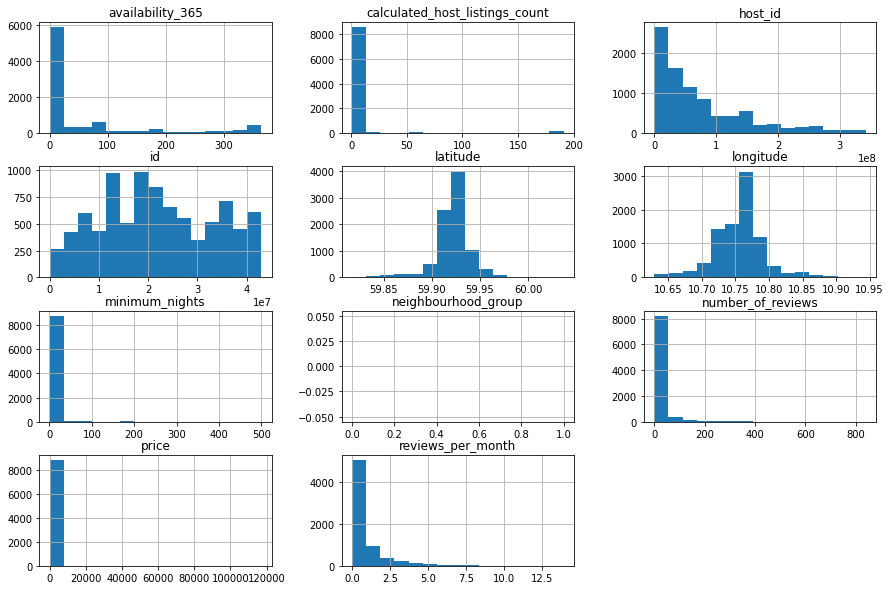

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


# **Há outliers presentes?**

Outliers são lançamentos de dados que irão prejudicar a sua análise. Os valores não seguem uma distribuição e distorcem a represetanção gráfica. 

São valores extremos que podem ser resultado de erros de mensuração ou captura dos dados. Ou podem ser eventos raros relatados. 

A seguir iremos utlizar o método de `describe` que auxilia nessa detecção. Serve para **descrever estatisticamente** minha variável.

In [ ]:
#Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8854.000000,8854.000000,8854.000000,6937.000000,8854.000000,8854.000000
mean,967.249040,4.210413,17.030608,0.897966,6.063248,59.185566
std,1720.239834,15.129095,40.243679,1.342553,27.917640,105.325326
min,82.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,550.000000,2.000000,1.000000,0.140000,1.000000,0.000000
50%,773.000000,2.000000,4.000000,0.400000,1.000000,0.000000
75%,1030.000000,3.000000,15.000000,1.000000,1.000000,80.000000
max,117096.000000,500.000000,840.000000,13.880000,191.000000,365.000000


*   A variável `price` possui valor máximo de 117.096, há preços de aluguéis provavelmente preenchidos de forma incorreta;
*   A quantidade mínima de noites (`minimum_nights`) apresentou valores preenchidos como 500, ou seja, acima 365 dias no ano. 



# Boxplot para coluna `price`

75% dos imóveis listados em Olso na Noruega, estão com preço até 1030 (dólares). 
Vamos ver quantos imóveis listados com preços acima disto e qual percentual representa do nosso conjunto de dados. 

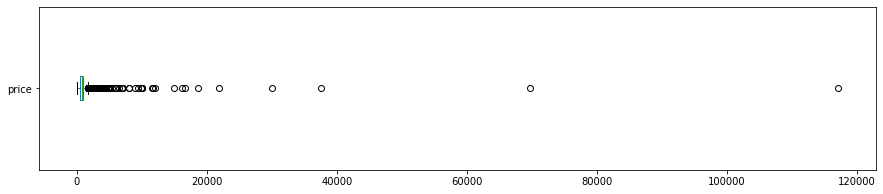

Preço: valores listados acima de 1030.00:
2210 entradas
24.9605%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores listados acima de 1030 dólares

print("Preço: valores listados acima de 1030.00:")
print("{} entradas".format(len(df[df.price > 1030])))
print("{:.4f}%".format((len(df[df.price > 1030]) / df.shape[0])*100))

# Histograma sem *Outliers*

Vamos remover os outliers da coluna preço e excluir a variável `neighbourhood_group` pois está vazia. 

Depois plotar os histogramas sem esses *outliers*.

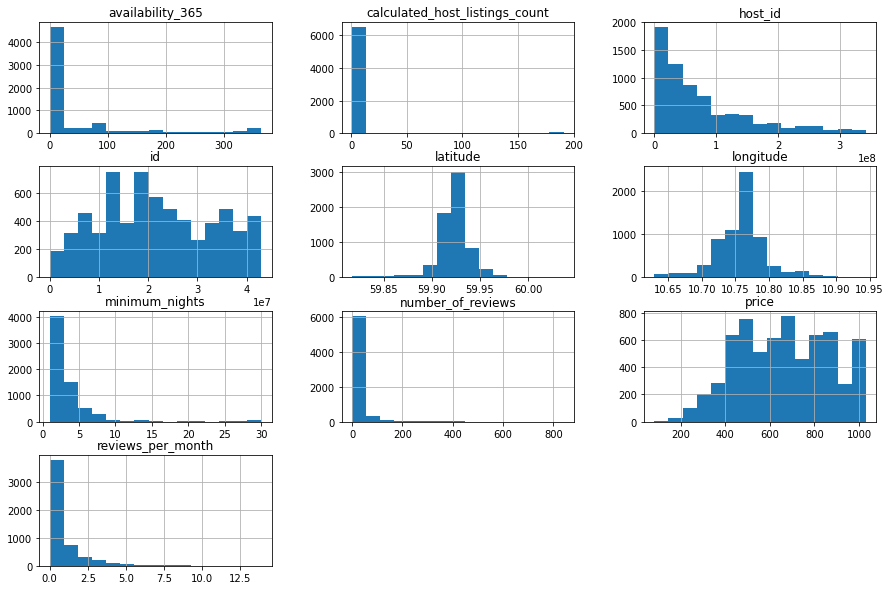

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1030].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df['price'].mean()

count      8854.000000
mean        967.249040
std        1720.239834
min          82.000000
25%         550.000000
50%         773.000000
75%        1030.000000
max      117096.000000
Name: price, dtype: float64

### **Qual a correlação existente entre as variáveis**

Iremos criar uma matriz para saber qual a intensidade da correlação entre as variáveis e depois plotar um `heatmap`(mapa de calor).

In [ ]:
# criar uma matriz de correlação

corr = df[[
        'price',
        'minimum_nights',
        'number_of_reviews',
        'minimum_nights',
        'reviews_per_month',
        'availability_365',
        'calculated_host_listings_count'
        ]].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,minimum_nights,reviews_per_month,availability_365,calculated_host_listings_count
price,1.000000,0.015056,-0.037264,0.015056,-0.051928,0.102754,0.062128
minimum_nights,0.015056,1.000000,-0.039688,1.000000,-0.062983,0.088759,-0.017608
number_of_reviews,-0.037264,-0.039688,1.000000,-0.039688,0.693716,0.170331,-0.048882
minimum_nights,0.015056,1.000000,-0.039688,1.000000,-0.062983,0.088759,-0.017608
reviews_per_month,-0.051928,-0.062983,0.693716,-0.062983,1.000000,0.173950,-0.053241
availability_365,0.102754,0.088759,0.170331,0.088759,0.173950,1.000000,0.168891
calculated_host_listings_count,0.062128,-0.017608,-0.048882,-0.017608,-0.053241,0.168891,1.000000


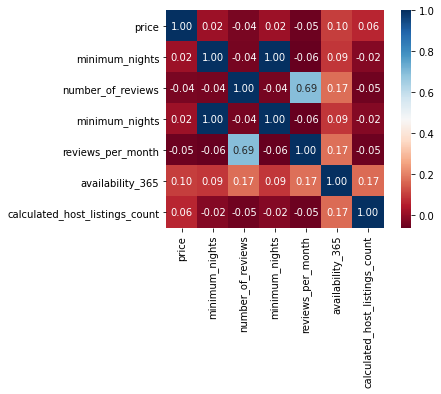

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square= True, linecolor ='white', annot= True);


### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Entire home/apt    7168
Private room       1589
Shared room          89
Hotel room            8
Name: room_type, dtype: int64

Com certeza Casa ou Apartamento inteiro são os preferidos. 

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/df.shape[0]

Entire home/apt    0.809578
Private room       0.179467
Shared room        0.010052
Hotel room         0.000904
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**



In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Sentrum           1767.604061
Nordstrand        1492.090909
Vestre Aker       1254.421739
Ullern            1153.939086
Frogner           1122.819767
Marka             1018.181818
St. Hanshaugen     963.295475
Nordre Aker        921.198473
Gamle Oslo         884.234834
Grünerløkka        859.204918
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

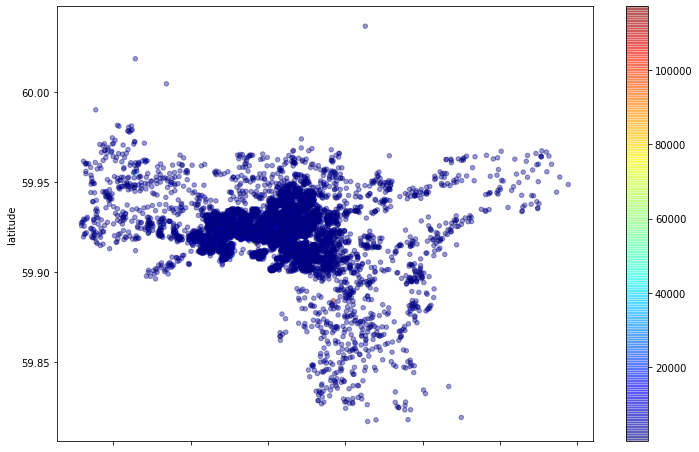

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'],
        cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Esta foi uma análise superficial onde pudemos perceber alguns outliers e a concentração de imóveis e em alguns poucos pontos pode distorcer as informações estatísticas de alguns atributos. 